importing all the libraries required for the project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Importing the DataSet using the read_csv function of the pandas library

In [3]:
#loading the dataset to a Pandas DataFrame
gold_data = pd.read_csv('/content/drive/MyDrive/GoldPricePrediction_dataset/gld_price_data.csv')

In [4]:
#print the first 5 rows to understand the initial timeframe of the DataSet
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#printing the last 5 rows to understand the dataset's last updated date
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns present in the dataset
gold_data.shape

(2290, 6)

In [7]:
#checking if there are any null values or imputation is required/cleaning of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking for any missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
#statistical measures of the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation of Data using heatmap**

Using the .corr() function to compute the correlation coefficient.

In [10]:
#Conversion of all columns to Numeric values to avoid errors during correlation
gold_data = gold_data.apply(pd.to_numeric, errors='coerce')

In [11]:
correlation = gold_data.corr()

<Axes: >

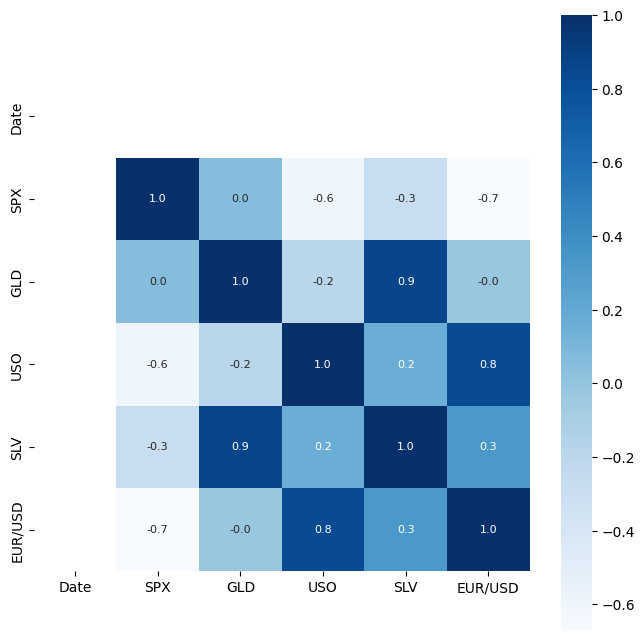

In [12]:
#constructing a heatmap to understand the correlation between the values
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
#correlation values of gold
print(correlation['GLD'])

Date            NaN
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-275e7b79f726>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

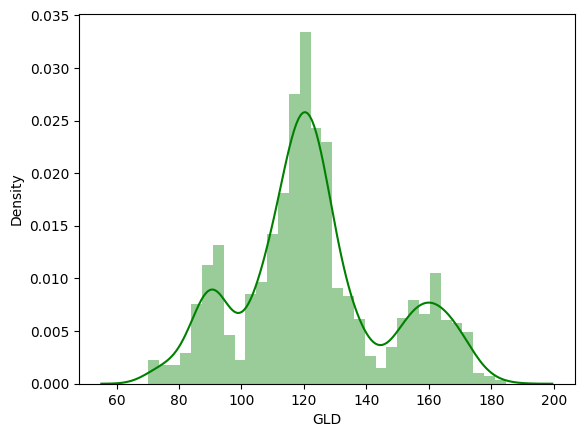

In [14]:
#understanding the distribution of the GLD using distplot
sns.distplot(gold_data['GLD'],color='green')

Creating a feature set by removing the Dates in order to train the model

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into **Training Data** and **Test Data**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: **Random Forest Regressor**

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
#prediction based on the test data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.54889967  81.69570005 115.95230078 127.53560077 120.66110153
 154.71619734 150.29369791 125.9252008  117.53549883 125.87480086
 116.49470126 172.37140075 141.65029893 167.54209894 115.1412998
 117.91490011 139.52690293 170.08390038 159.49700321 159.87959923
 155.03330027 125.01100024 176.09409969 157.03880298 125.12170028
  93.80320001  77.49060004 120.88609993 119.11019945 167.4865014
  88.06940061 125.15450014  91.26920076 117.62890072 121.09239906
 136.05790074 115.49810104 114.93680079 146.24519963 107.10100122
 104.25460228  87.09599766 126.53150036 118.10739981 152.83879947
 119.62000024 108.4571002  108.04839848  93.2144005  127.08839801
  74.71290049 113.71419914 121.33520005 111.29139907 118.84639882
 120.80909948 160.16659981 167.69610073 146.87189678  86.01939888
  94.3494004   86.82049895  90.54190023 118.9452008  126.55170061
 127.42390045 170.55960015 122.27999957 117.48769864  98.79810029
 167.64670154 143.09759802 132.40090239 121.24190206 120.77799964
 119.5835006